In [125]:
from pathlib import Path
import numpy as np
import pandas as pd
import csv
import math

In [2]:
paths = list(Path(".").glob("../sample_data/*/Eyetracking/txt/*"))

In [3]:
eyetracking_files = [file for file in paths if "TP_S" in str(file)]

In [81]:
def et_samples_to_pandas(samplepath,start_trg,end_trg, Variables):

    """Converts raw text output from eye-tracker to pandas dataframe, this is only for The Present video. Triggers are different

    :ET sample file path:
    :start_trg: Start triger, string
    :End_trg: End triger, string
    :Variables: Variable list to extract, list of string. i.e. ['Time', 'L Raw X [px]','L Raw Y [px]'
    :return: Dataframe with eye-tracking raw samples
    """ 
    try:

        with open(samplepath) as f:
            reader = csv.reader(f, delimiter='\t')
            content = list(reader)[37:]
    
            headers = content[0]
    
            df = pd.DataFrame(content[1:], columns=headers, dtype='float')
    except:
        
        with open(samplepath) as f:
            reader = csv.reader(f, delimiter='\t')
            content = list(reader)[38:]
    
            headers = content[0]
            df = pd.DataFrame(content[1:], columns=headers, dtype='float')
    start_trg='# Message: '+str(start_trg)
    end_trg='# Message: '+str(end_trg)

    msg_time = list(df[df.Type == 'MSG'].Time)
    
    try: 
        df_msg=df[df.Type == 'MSG']
        start_idx = list(df_msg.iloc[:,3]).index(start_trg)
        end_idx = list(df_msg.iloc[:,3]).index(end_trg)
    except:
        print 'At least one trigger is not found,pleas check your trigger',start_idx,end_idx
    
    
    start_time = float(msg_time[start_idx])
    end_time = float(msg_time[end_idx])

    df_msg_removed = df[(df.Time > start_time) & (df.Time < end_time)][Variables]
    # Re-align time to make the first alwyas 0.
    df_msg_removed['Time'] = df_msg_removed['Time']-df_msg_removed['Time'].iloc[0]
    #print(df_msg_removed.head(10))

    return df_msg_removed

In [ ]:
def et_to_accuracy_precision(df,target_x,target_y):

    """giving a dataframe of the eyetracking data (can be the full data frame or just a few columns required.), a target x and y locaiton, export the accuracy and precision
    # Rereference: Accuracy and precision of the Tobii X2-30 eye-tracking under non ideal conditions    

    :df: data frame, should include: ['Time', 'L POR X [px]','L POR Y [px]','R POR X [px]','R POR Y [px]','L EPOS X','L EPOS Y','L EPOS Z','R EPOS X','R EPOS Y','R EPOS Z']
    :target_x: int
    :target_y: int
    :return: signle numebr of accuracy and precision
    """    
    df['POR X [px]']=(df['L POR X [px]'] + df['R POR X [px]'])/2
    df['POR Y [px]']=(df['L POR Y [px]'] + df['R POR Y [px]'])/2
    df['EPOS X']=(df['L EPOS X'] + df['R EPOS X'])/2
    df['EPOS Y']=(df['L EPOS Y'] + df['R EPOS Y'])/2
    df['EPOS Z']=(df['L EPOS Z'] + df['R EPOS Z'])/2
    
    #df['a']=np.sqrt((df['EPOS X']-target_x)**2+(df['EPOS Y']-target_y)**2+(df['EPOS Z']-0)**2)
    #df['b']=np.sqrt((df['EPOS X']-df['POR Y [px]'])**2+(df['EPOS Y']-df['POR Y [px]'])**2+(df['EPOS Z']-0)**2)

    df['a']=np.sqrt((df['EPOS X']-target_x)**2+(df['EPOS Y']-target_y)**2+(df['EPOS Z']-0)**2)
    df['b']=np.sqrt((df['EPOS X']-df['POR Y [px]'])**2+(df['EPOS Y']-df['POR Y [px]'])**2+(df['EPOS Z']-0)**2)
    
    angle=math.atan2(np.linalg.norm(np.cross(df['a'],df['b'])),np.dot(df['a'],df['b']))
    cross_ab=[np.cross(i,j) for i,j in zip(df['a'],df['b'])]

    
    
    

In [5]:
eyefile = []
idx=0
for eyetracking_file in eyetracking_files:
    print(idx)
    print(eyetracking_file)
    #fimge = np.genfromtxt(str(eyetracking_file), delimiter=",", skip_header=2)
    try:
        df = et_samples_to_pandas(str(eyetracking_file),'84','104',['Time', 'R Raw X [px]','R Raw Y [px]'])
        df = et_samples_to_pandas(str(eyetracking_file),'84','104',["Time","R POR X [px]","R POR Y [px]"])
        fimge=np.array(df['R POR X [px]'])
        print(len(fimge))
        if len(fimge) > 24000:
            eyefile.append(fimge[0:24000])
    except:
        print('Error')
    idx +=1
    if idx > 30:
        break
        
    

0
../sample_data/NDARAA117NEJ/Eyetracking/txt/NDARAA117NEJ_Video-TP_Samples.txt
Error
1
../sample_data/NDARAA948VFH/Eyetracking/txt/NDARAA948VFH_Video-TP_Samples.txt
Error
2
../sample_data/NDARAB055BPR/Eyetracking/txt/NDARAB055BPR_Video-TP_Samples.txt
         Time  R Raw X [px]  R Raw Y [px]
252       0.0          0.00          0.00
253   16669.0       1492.68        810.42
254   33323.0       1495.02        810.55
255   49996.0          0.00          0.00
256   66632.0       1494.93        813.92
257   83310.0       1496.19        812.41
258   99948.0          0.00          0.00
259  116625.0          0.00          0.00
260  133269.0       1498.76        807.04
261  149950.0          0.00          0.00
Error
3
../sample_data/NDARAB348EWR/Eyetracking/txt/NDARAB348EWR_Video-TP_Samples.txt
         Time  R Raw X [px]  R Raw Y [px]
256       0.0       1565.00        703.83
257   16654.0       1567.06        707.18
258   33324.0       1569.14        711.04
259   49971.0       1570.57     

In [8]:
len(eyefile)

0

In [133]:
X = np.array(eyefile)

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=5)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.50545401 0.01839624 0.01507984 0.0126486  0.00996238]


In [136]:
principalComponents

array([[-1.09241648e+04, -3.04440780e+03, -1.42274688e+03,
        -1.17349756e+03, -3.77651554e+02],
       [-7.39759210e+03,  8.75817871e+01,  1.93868569e+02,
        -9.39171395e+02, -3.14084503e+02],
       [-8.69976361e+03, -2.11921590e+03,  2.61690245e+02,
        -4.72041096e+02,  6.41236237e+02],
       [ 4.77334246e+04,  5.97292289e+02,  1.05307808e+03,
        -1.62682218e+02, -4.42251426e+03],
       [-1.20363306e+04, -1.42828298e+02, -1.27355488e+02,
        -1.02125116e+03, -2.23714657e+02],
       [-6.80761086e+03, -1.34057968e+03, -2.12659931e+02,
         2.07074052e+02,  1.78264297e+02],
       [-5.61077738e+03,  9.38908581e+02,  7.12344124e+02,
        -4.12261657e+02, -3.33823128e+02],
       [ 1.88738121e+04,  1.40121913e+03, -9.48535018e+03,
        -2.26183417e+03, -9.78066209e+03],
       [-8.08831734e+03, -3.35403505e+01, -3.38134957e+02,
        -3.15475620e+02, -1.53008124e+02],
       [-6.14900829e+03, -3.52770694e+03,  6.88087362e+01,
        -6.45442584e+02

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
from scipy.linalg import svd

In [139]:
[U, D, V] = svd(X)

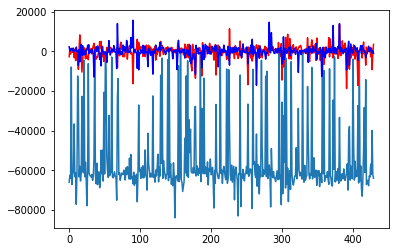

In [140]:
plt.plot(U[:, 0]*D[0])
plt.plot(U[:, 1]*D[1],'r')
plt.plot(U[:, 2]*D[2],'b')

In [ ]:
plt.plot(U[:, 0]*D[0])

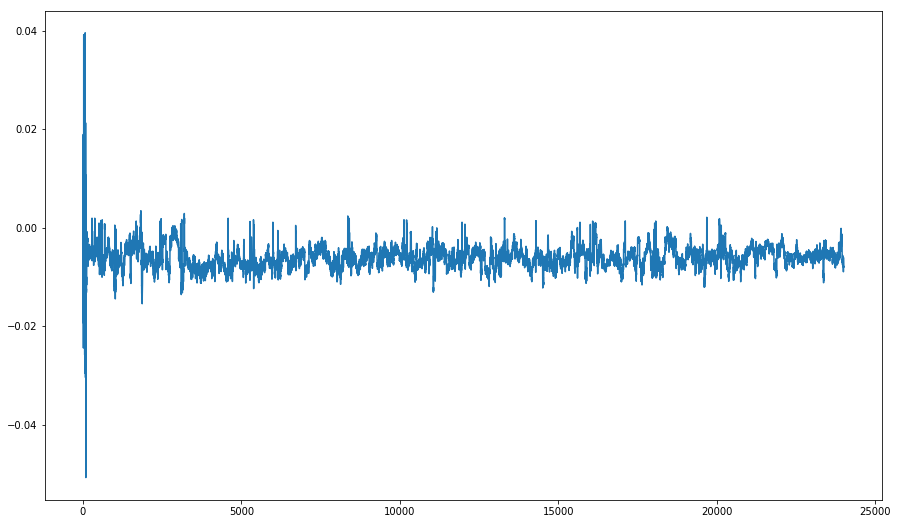

In [105]:
plt.figure(figsize=(15,9))
plt.plot(V[:, 0])

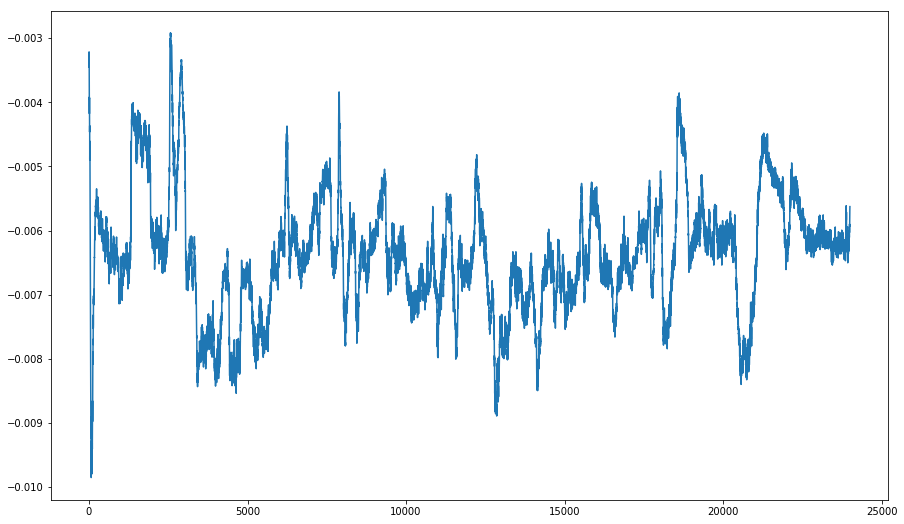

In [109]:
plt.figure(figsize=(15,9))
plt.plot(V[0, :])